**Put any package imports you need in the below space**

In [289]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import math
from numpy import linalg as la
from scipy import linalg as sciLA
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

**Exercise 1**: Generating the data set. Generate a total of 60 points whose (x,y)-coordinates are drawn from a mixture of three Gaussians in a 2-dimentional real space. Each mixture has a mean of 2, 4, and 6, respectively, a standard deviation of one, and about 20 points.

1. Plot all the points in a single 2-dimensional space by using different shapes for each mixture.
2. Plot a histogram of all the points.

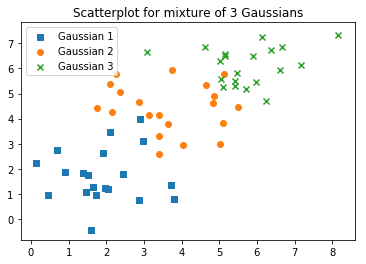

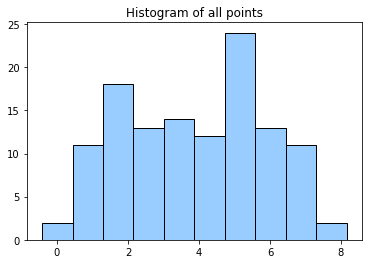

In [307]:
mu, sigma = 2, 1 # mean and standard deviation
g1 = np.random.normal(mu, sigma, (2,20))

mu, sigma = 4, 1 # mean and standard deviation
g2 = np.random.normal(mu, sigma, (2,20))

mu, sigma = 6, 1 # mean and standard deviation
g3 = np.random.normal(mu, sigma, (2,20))
g1 = [[ 3.78862847,  2.43650985,  2.09649747,  0.1365073 ,  1.7226118 ,
         1.64524102,  1.91725852,  1.37299932,  1.95618183,  1.52278197,
         0.68613525,  2.88462238,  2.88131804,  3.70957306,  2.05003364,
         1.59532259,  1.45464005,  0.45352268,  2.98236743,  0.89893237],
       [ 0.81495347,  1.7943501 ,  3.48614836,  2.23671627,  0.97621486,
         1.2870068 ,  2.62524497,  1.83948664,  1.23116365,  1.76996928,
         2.74505627,  3.97611078,  0.75587667,  1.37358309,  1.19623391,
        -0.41908317,  1.07620798,  0.97612424,  3.12397796,  1.86808577]]
g2=[[ 2.37671455,  4.64667545,  3.64372924,  2.25685896,  3.40335036,
         3.41140562,  3.1261177 ,  4.02971382,  1.75174223,  3.73223814,
         5.01318344,  4.85279784,  5.1081875 ,  5.11939066,  5.48754313,
         2.88169932,  4.84583341,  2.13911047,  3.3971149 ,  2.08552796],
       [ 5.04814751,  5.33373782,  3.80258532,  5.77464503,  3.32527249,
         4.15061687,  4.1529457 ,  2.93580473,  4.43794661,  5.93897846,
         2.97506913,  4.89933845,  3.84549315,  5.7696273 ,  4.48378835,
         4.6762164 ,  4.64316328,  4.24908671,  2.6042365 ,  5.39166291]]
g3=[[ 4.62933099,  6.23856319,  6.61407709,  5.16208773,  6.14506321,
         7.16788229,  5.97589553,  5.11134258,  3.08426225,  5.0281595 ,
         5.40892126,  5.48358263,  5.04000382,  6.37729523,  5.42529158,
         5.89054567,  6.6790716 ,  5.14456283,  5.69979393,  8.15814934],
       [ 6.87428572,  4.70646337,  5.92025906,  6.56448552,  7.23347104,
         6.14898639,  5.46941786,  5.26947336,  6.64506198,  6.31306037,
         5.48335208,  5.81092833,  5.58380198,  6.72465766,  5.31003932,
         6.48641448,  6.85151895,  6.48624933,  5.16576015,  7.34499246]]
Mixture = [g1, g2 , g3]
Mixture = [([[ 3.78862847,  2.43650985,  2.09649747,  0.1365073 ,  1.7226118 ,
         1.64524102,  1.91725852,  1.37299932,  1.95618183,  1.52278197,
         0.68613525,  2.88462238,  2.88131804,  3.70957306,  2.05003364,
         1.59532259,  1.45464005,  0.45352268,  2.98236743,  0.89893237],
       [ 0.81495347,  1.7943501 ,  3.48614836,  2.23671627,  0.97621486,
         1.2870068 ,  2.62524497,  1.83948664,  1.23116365,  1.76996928,
         2.74505627,  3.97611078,  0.75587667,  1.37358309,  1.19623391,
        -0.41908317,  1.07620798,  0.97612424,  3.12397796,  1.86808577]]), ([[ 2.37671455,  4.64667545,  3.64372924,  2.25685896,  3.40335036,
         3.41140562,  3.1261177 ,  4.02971382,  1.75174223,  3.73223814,
         5.01318344,  4.85279784,  5.1081875 ,  5.11939066,  5.48754313,
         2.88169932,  4.84583341,  2.13911047,  3.3971149 ,  2.08552796],
       [ 5.04814751,  5.33373782,  3.80258532,  5.77464503,  3.32527249,
         4.15061687,  4.1529457 ,  2.93580473,  4.43794661,  5.93897846,
         2.97506913,  4.89933845,  3.84549315,  5.7696273 ,  4.48378835,
         4.6762164 ,  4.64316328,  4.24908671,  2.6042365 ,  5.39166291]]), ([[ 4.62933099,  6.23856319,  6.61407709,  5.16208773,  6.14506321,
         7.16788229,  5.97589553,  5.11134258,  3.08426225,  5.0281595 ,
         5.40892126,  5.48358263,  5.04000382,  6.37729523,  5.42529158,
         5.89054567,  6.6790716 ,  5.14456283,  5.69979393,  8.15814934],
       [ 6.87428572,  4.70646337,  5.92025906,  6.56448552,  7.23347104,
         6.14898639,  5.46941786,  5.26947336,  6.64506198,  6.31306037,
         5.48335208,  5.81092833,  5.58380198,  6.72465766,  5.31003932,
         6.48641448,  6.85151895,  6.48624933,  5.16576015,  7.34499246]])]

fig = plt.figure()
fig = fig.add_subplot(111)
fig.scatter(g1[0], g1[1], marker="s", label='Gaussian 1')
fig.scatter(g2[0], g2[1], marker="o", label='Gaussian 2')
fig.scatter(g3[0], g3[1], marker="x", label='Gaussian 3')
plt.legend(loc='upper left')
plt.title("Scatterplot for mixture of 3 Gaussians")
plt.show()

histogramData = [point for g in Mixture for point in list(g[0])+list(g[1])]
plt.hist(histogramData, facecolor="#99CCFF", ec='black')
plt.title("Histogram of all points")
plt.show()                

**Exercise 2**: Generating the similarity graphs. Write a script that generates the following similarity graphs for the data set in Exercise 1 (see Lecture Notes):

1. KNN: The K-nearest neighbor graph using the value of K=10. Plot the graph.
2. GK: The complete similarity graph using the Gaussian kernel with sigma=1 as similarity function. Plot the graph.


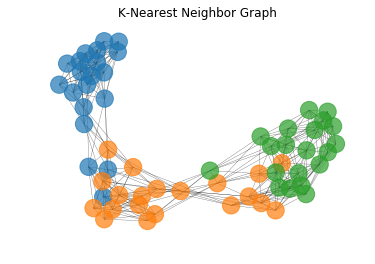

In [311]:
allPoints = list(zip(*g1)) + list(zip(*g2)) + list(zip(*g3))

#n_neighbours = 11 because NearestNeighbors includes distance to itself
nbrs = NearestNeighbors(n_neighbors=11, algorithm='auto', metric='euclidean').fit(allPoints)
knnMatrix = nbrs.kneighbors_graph(allPoints).toarray()

#Setting diagonal values to zero to exclude the vertex being a neighbor to itself
diagonalArray = np.diag_indices(len(allPoints))
knnMatrix[diagonalArray] = 0 
#Creating a KNN graph from matrix
knnGraph = nx.from_numpy_matrix(knnMatrix)
nodeColors = ["#1F77B4" for node in zip(*g1)]+["#FF7F0E" for node in zip(*g2)]+["#2CA02C" for node in zip(*g3)]
nx.draw_networkx(knnGraph,node_color=nodeColors, with_labels=False, width=0.3, alpha=0.7)
plt.axis("off")
plt.title("K-Nearest Neighbor Graph")

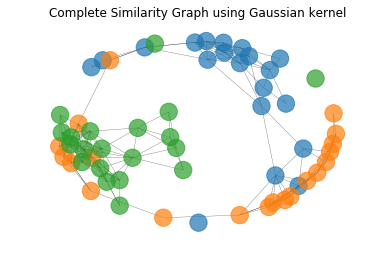

In [313]:
sigma=1
threshold = 0.5
numOfPoints = len(allPoints)

#Creating adjacency matrix based on similarity
similarityMatrix = np.zeros((numOfPoints, numOfPoints))
for i in range(numOfPoints-1):
    for j in range(i+1,numOfPoints):
        x1 = allPoints[i][0]
        y1 = allPoints[i][1]
        x2 = allPoints[j][0]
        y2 = allPoints[j][1]
        #Calculate Euclidian distance between 2 points 
        dis= math.sqrt(((x1-x2)*(x1-x2))+((y1-y2)*(y1-y2)))
        similarity = math.exp(-1*((dis*dis)/(2*sigma*sigma)))
        if similarity > threshold:
            similarityMatrix[i][j] = 1
            similarityMatrix[j][i] = 1
            
#Creating a complete similarity graph from similarity matrix
simGraph = nx.from_numpy_matrix(similarityMatrix)
nx.draw_networkx(simGraph,node_color=nodeColors, with_labels=False, width=0.3, alpha=0.7)
plt.axis("off")
plt.title("Complete Similarity Graph using Gaussian kernel")

**Exercise 3**: Characterizing the graph spectra. Write a script that generates the graph Laplacian matrix L = D - A and the normalized graph Laplacian matrix $\hat{L} = I - \hat{A}$ and calculates the graph spectra for each of the graphs in Exercise 2.

Plot each graph's eigenspectra as a separate figure with i as x-axis and $\lambda_i$ as y-axis (four lines).


[15, 59]


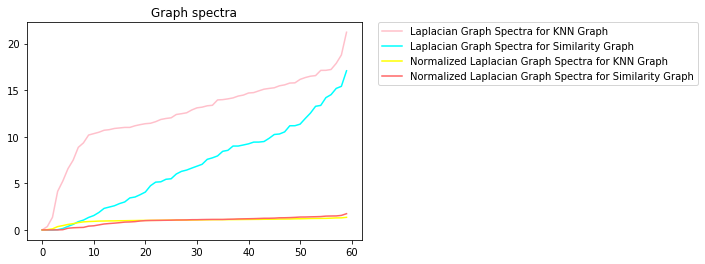

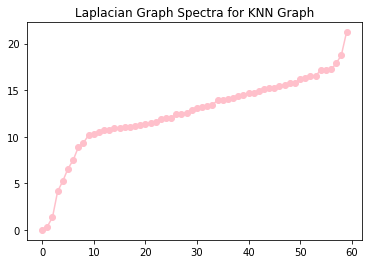

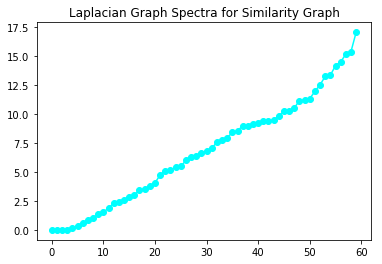

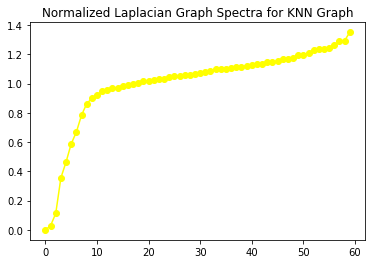

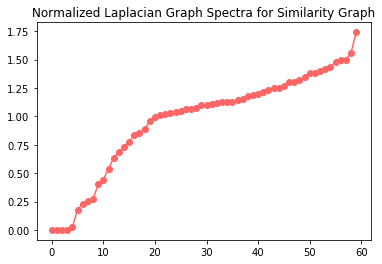

In [314]:

#Calculating Laplacian matrices
lapMatrixKNN = nx.laplacian_matrix(knnGraph)
lapMatrixSim = nx.laplacian_matrix(simGraph)

#Calculating normalized Laplacian matrices
normalizedLapMatrixKNN = nx.normalized_laplacian_matrix(knnGraph)
normalizedLapMatrixSim = nx.normalized_laplacian_matrix(simGraph)

#Calculating Laplacian Graph specta
evLapKNN = nx.laplacian_spectrum(knnGraph)
evLapSim = nx.laplacian_spectrum(simGraph)

#Calculating normalized Laplacian Graph spectra
evNorLapKNN = la.eigvals(normalizedLapMatrixKNN.todense())
evNorLapSim = la.eigvals(normalizedLapMatrixSim.todense())

#Plotting combined line graph
fig = plt.figure()
fig = fig.add_subplot(111)
plt.title("Graph spectra")
fig.plot(sorted(evLapKNN),color="pink", label='Laplacian Graph Spectra for KNN Graph')
fig.plot(sorted(evLapSim),color="aqua" , label='Laplacian Graph Spectra for Similarity Graph')
fig.plot(sorted(evNorLapKNN),color="yellow",  label='Normalized Laplacian Graph Spectra for KNN Graph')
fig.plot(sorted(evNorLapSim),color="#ff6666",  label='Normalized Laplacian Graph Spectra for Similarity Graph')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Plot Laplacian Graph Spectra for KNN Graph
plt.plot(sorted(evLapKNN), marker="o", color="pink")
plt.title("Laplacian Graph Spectra for KNN Graph")
plt.show()

#Plot Laplacian Graph Spectra for Similarity Graph
plt.plot(sorted(evLapSim), marker="o", color="aqua")
plt.title("Laplacian Graph Spectra for Similarity Graph")
plt.show()

#Plot Normalized Laplacian Graph Spectra for KNN Graph
plt.plot(sorted(evNorLapKNN), marker="o", color="yellow")
plt.title("Normalized Laplacian Graph Spectra for KNN Graph")
plt.show()

#Plot Normalized Laplacian Graph Spectra for Similarity Graph
plt.plot(sorted(evNorLapSim), marker="o", color="#ff6666")
plt.title("Normalized Laplacian Graph Spectra for Similarity Graph")
plt.show()

*What do you observe about the multiplicity of the "close to" zero eigenvalues? Are your observations consistent with the Properties described in lecture notes?*

Answer:
The presence of the "close to" zero eigenvalues means that the graph is "close to" being disconnected i.e. there is a possibility of a community in the graph. The multiplicity of such almost zero eigenvalues is equal to the number of sparsely connected components in the graph. 
The observations from the above graphs are consistent with the lecture notes. There are approximately 3 "close to" zero eigenvalues in the above graphs, which is the expected behavior as we generated 3 communities of random points.


Plot each graph's eigenvector plot for the eigenvector u corresponding to the second smallest eigenvalue, with i as x-axis and u_i vector component as y-axis.

58


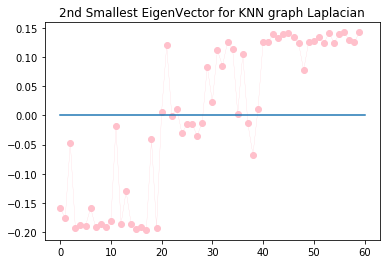

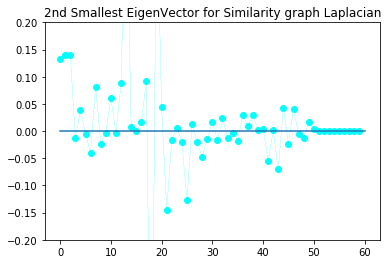

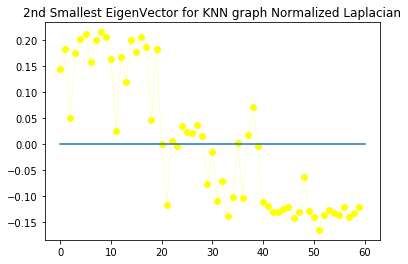

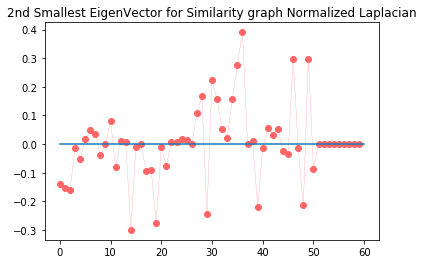

In [304]:
#Calculate the eigenvalues and eigenvectors
evLapKNN, evLapKNN_vecs = sciLA.eig(lapMatrixKNN.todense())
evLapSim, evLapSim_vecs = sciLA.eig(lapMatrixSim.todense())
evNorLapKNN, evNorLapKNN_vecs = sciLA.eig(normalizedLapMatrixKNN.todense())
evNorLapSim, evNorLapSim_vecs = sciLA.eig(normalizedLapMatrixSim.todense())

# Get the index for second smallest eigenvector 
index =[i[0] for i in sorted(enumerate(evLapKNN), key=lambda x:x[1])]
lapKNNIndex = index[1]
index =[i[0] for i in sorted(enumerate(evLapSim), key=lambda x:x[1])]
lapSimIndex = index[1]
print(lapSimIndex)
index =[i[0] for i in sorted(enumerate(evNorLapKNN), key=lambda x:x[1])]
norLapKNNIndex = index[1]
index =[i[0] for i in sorted(enumerate(evNorLapSim), key=lambda x:x[1])]
norLapSimIndex = index[1]

#Getting the second smallest eigenvectors
vectorLapKNN = np.real(evLapKNN_vecs[:,lapKNNIndex])
vectorLapSim = np.real(evLapSim_vecs[lapSimIndex])
vectorNorLapKNN = np.real(evNorLapKNN_vecs[:,norLapKNNIndex])
vectorNorLapSim = np.real(evNorLapSim_vecs[norLapSimIndex])

#Plotting graphs
plt.plot(vectorLapKNN, marker="o", color="pink", linewidth=0.2)
plt.plot((0,n), (0,0))
plt.title("2nd Smallest EigenVector for KNN graph Laplacian")
plt.show()

plt.plot(vectorLapSim, marker="o", color="aqua", linewidth=0.2)
plt.plot((0,n), (0,0))
plt.ylim(-0.2, 0.2)
plt.title("2nd Smallest EigenVector for Similarity graph Laplacian")
plt.show()

plt.plot(vectorNorLapKNN, marker="o", color="yellow", linewidth=0.2)
plt.plot((0,n), (0,0))
plt.title("2nd Smallest EigenVector for KNN graph Normalized Laplacian")
plt.show()

plt.plot(vectorNorLapSim, marker="o", color="#ff6666", linewidth=0.2)
plt.plot((0,n), (0,0))
plt.title("2nd Smallest EigenVector for Similarity graph Normalized Laplacian")
plt.show()


*If you were using this plot for 2-way graph partitioning into S and V-S, the points from which mixtures will end up in which partition?*

Answer:
Assuming the threshold to be at 0.0, from the eigenvector plots for KNN graph, we can roughly put the points from 0-20 in one partition and the points from 40-60 in the other partition. The points between 20-40 lie in both the partitions.
Similar behavior can be seen for Similarity graph.

Calculate the conductance (write the script) for each of the identified partitions, S and V-S for the KNN graph using both the normalized and unnormalized Laplacian. Also, calculate the lower and upper bounds for the graph conductance using the inequalities provided in the lecture notes. Print the results of these calculations (make sure to label them).

In [305]:
def findConductance(partition):
    #Assuming graph to be undirected
    totalEdges = nx.edges(knnGraph,partition)
    countExternal = len(totalEdges)
    for edge in totalEdges:
        #Decrease count if the edge is internal
        if edge[0] in partition and edge[1] in partition:
            countExternal = countExternal - 1
    conductance = countExternal/len(totalEdges)
    return conductance

#Second eigenvalue for KNN graph
valueLapKNN = np.real(evLapKNN[lapKNNIndex])
valueNorLapKNN = np.real(evNorLapKNN[norLapKNNIndex])

#Get the list of nodes in each partition using unnormalized laplacian
partition1 = list(np.nonzero(vectorLapKNN>0)[0])
partition2 = list(np.nonzero(vectorLapKNN<=0)[0])
lower = valueLapKNN/2
upper = np.sqrt(2*valueLapKNN)
conductanceP1 = findConductance(partition1)
conductanceP2 = findConductance(partition2)
print("Conductance for KNN graph with un-normalized Laplacian")
print("Conductance for first partition(S): ",conductanceP1)
print("Conductance for second partition(V-S): ",conductanceP2)
print("Lower bound: ",lower)
print("Upper bound: ",upper)

#Get the list of nodes in each partition using normalized laplacian
partition1 = list(np.nonzero(vectorNorLapKNN>0)[0])
partition2 = list(np.nonzero(vectorNorLapKNN<=0)[0])
lower = valueNorLapKNN/2
upper = np.sqrt(2*valueNorLapKNN)
conductanceP1 = findConductance(partition1)
conductanceP2 = findConductance(partition2)
print("\nConductance for KNN graph with normalized Laplacian")
print("Conductance for first partition(S): ",conductanceP1)
print("Conductance for second partition(V-S): ",conductanceP2)
print("Lower bound: ",lower)
print("Upper bound: ",upper)

Conductance for KNN graph with un-normalized Laplacian
Conductance for first partition(S):  0.15
Conductance for second partition(V-S):  0.17647058823529413
Lower bound:  0.181774660752
Upper bound:  0.852700793366

Conductance for KNN graph with normalized Laplacian
Conductance for first partition(S):  0.15625
Conductance for second partition(V-S):  0.14150943396226415
Lower bound:  0.0143826132922
Upper bound:  0.239855067007


**Exercise 4**: Spectral graph clustering. Write a script that performs spectral graph clustering using the normalized graph Laplacian of each of the graph in Exercise 2. The pseudo-code of the clustering method is described in the lecture notes. For the k-means clustering method use the value of k=3. Run the spectral graph clustering and plot the corresponding points in Ex.1 with the shapes based on the identified cluster (one plot for each graph). In addition, run the k-means clustering algorithm on the data set in Exercise 1, using the Euclidean distance as the dissimilarity metric, and the value of k=3. Plot these results in 2-dimensional space but use different shape for each of the identified cluster. You should have three plots: two for each graph using spectral clustering, and one for k-means on the original data.

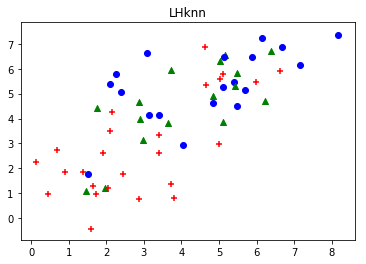

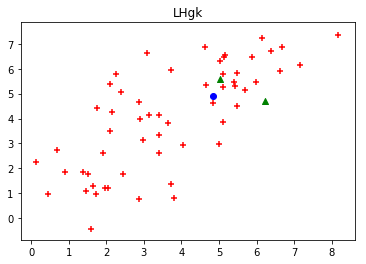

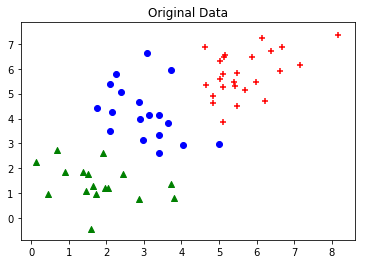

In [306]:
def spectralClustering(mat, k):
    vals, vecs = la.eig(mat)
    indexes = sorted(range(n), key=lambda i: eigs[i])[:k]
    U = np.real(vecs[:,indexes])
    Y = normalize(U, axis=1, norm='l1')
    cluster = KMeans(n_clusters=k)
    cluster.fit(Y)
    return cluster.labels_

    
LHknn_cluster = spectralClustering((normalizedLapMatrixKNN.todense()), 3)
LHgk_cluster = spectralClustering((normalizedLapMatrixSim.todense()), 3)
mat = np.array(allPoints)
cluster = KMeans(n_clusters=3)
cluster.fit(mat)
cluster = cluster.labels_

colors = ["r", "g", "b"]
markers = ["+", "^", "o"]
labels = ["LHknn", "LHgk", "Original Data"]
clusters = [LHknn_cluster, LHgk_cluster, cluster]
for l,c in zip(labels, clusters):
    for i,p in enumerate(allPoints):
        plt.scatter(p[0], p[1], c=colors[c[i]], marker=markers[c[i]])
    plt.title(l)
    plt.show()